# Hello World for Neural Networks

*This notebook is a customized version of the tensorflow tutorial [MNIST for ML Beginners](https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners)*

MNIST is a commonly known computer vision dataset, that consists of images of handwritten digits. The dataset is used to train machine learning models to correctly classify the images as digits 0 to 9.

All images are grayscale and have a dimension of 28 by 28 pixels. The dataset as used in this notebook split into three groups: train, validate and test. Which consists of respectively 55.000, 5.000 and 10.000 samples. The original datasets can be found at http://yann.lecun.com/exdb/mnist/.

Steps of this notebook:
- [Data exploration](#Data-exploration)
- [Multinominal Logistic Regression model](#Multinominal-Logistic-Regression-model)
- [Multi Layer Convolution Neural Network](#Multi-Layer-Convolution-Neural-Network)

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

/Users/widovanheemstra/Virtualenvs/anaconda3/envs/datascience/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
data_dir = "data"

Read the datasets and if not available download them. Each sample has also the true label, indicating the digit the image represents. This true label is read as a one-hot vector.

One-hot vector is a way to represent categorical data to be used in models. Each label or category is used as column and per sample only one column can be set to 1 where the others are set to 0. The image below shows how the digits are represented as one-hot vectors. 

![](images/one-hot.png)

In [3]:
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


## Data exploration

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

Now we have the data loaded. Lets show how it looks.

In [5]:
# Get the dimensions of the training dataset
print("Train dataset samples size:", mnist.train.images.shape)
print("Train dataset label size:", mnist.train.labels.shape)

Train dataset samples size: (55000, 784)
Train dataset label size: (55000, 10)


The samples are now one big vector and not 28 by 28. This is something to consider when using the data.

To plot the data we need to reshape the vector to get a normal picture.

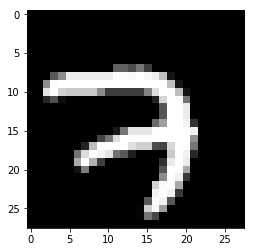

In [6]:
plt.imshow(mnist.train.images[0].reshape([28, 28]), cmap='gray')

Check to label of this image.

In [7]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Multinominal Logistic Regression model

### Basic configuration

- fully connected network: all inputs are fed to all neurons in the next layer
- each pixel of the image is used as input: 782 inputs (28x28 pixels)
- the network is very simple and consists of only an input and an output layer, no hidden layers

The regression model we are going to build will graphically look like.

$$y = Xb + a$$

![](images/mnist_1layer.png)

### Feedforward pass

The model will take as input all pixels of an image and give a probability for it of being each digit. This is a typical situation in which you will use the Softmax regression model. Softmax normalizes a probability for each class so that all probabilities add up to 1.

$$softmax(x_{i}) = \frac{e^{x_{i}}}{\sum _{j=0}^{k}e^{x_{j}}}$$

- Plaatje formule vorm
- Vertaling formula naar matrices

![](images/weights_analogy_1.png)

### Back propagation

# 

In [5]:
# Create the model

# Define placeholders: input values and their true labels
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Define variables: values that will be adjusted per epoch
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Define the calculation
y = tf.matmul(x, W) + b

In [6]:
# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [7]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [8]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

Accuracy:  0.9144


In [9]:
def custom_cmap(numcolors=100, name='custom_cmap',
                    mincol='red', midcol='black', maxcol='blue'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

custom_map = custom_cmap()

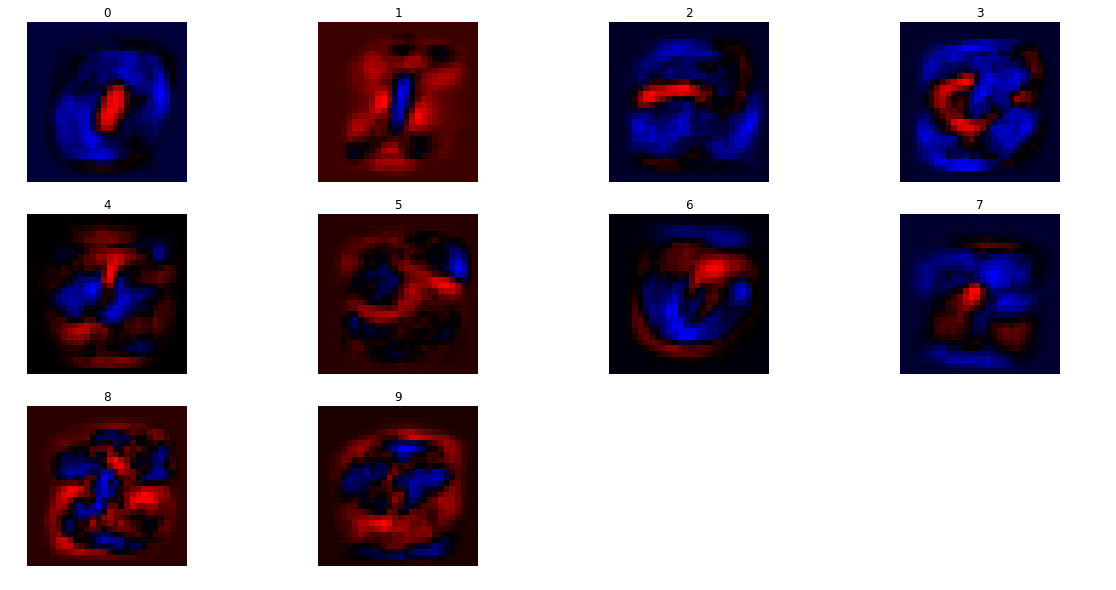

In [10]:
# tensor to numpy conversion
weights = W.eval()

fig, axs = plt.subplots(3, 4, figsize=(20, 10))

[x.axis('off') for x in axs.ravel()]

for i in range(0, 10):
    axs[(i // 4), (i % 4)].imshow(weights[:, i].reshape([28, 28]), cmap=custom_map)
    axs[(i // 4), (i % 4)].set_title(i)
    #axs[(i // 4), (i % 4)].axis('off')

## Multi Layer Convolution Neural Network

### Weight Initialization

In [11]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Convolution and Pooling

In [12]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W,
                        strides=[1, 1, 1, 1],
                        padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')

### First Convolutional Layer

In [13]:
x_image = tf.reshape(x, [-1,28,28,1])

In [14]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### Second Convolutional Layer

In [15]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

### Densely Connected Layer

In [16]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#### Dropout

In [17]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer (final)

In [18]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

### Train and Test

In [19]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.04
step 100, training accuracy 0.86
step 200, training accuracy 0.9
step 300, training accuracy 0.9
step 400, training accuracy 0.96
step 500, training accuracy 0.98
step 600, training accuracy 0.88
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.98
step 1000, training accuracy 0.94
step 1100, training accuracy 1
step 1200, training accuracy 1
step 1300, training accuracy 0.96
step 1400, training accuracy 0.94
step 1500, training accuracy 1
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 1
test accuracy 0.9774


Resources:
1. MNIST for ML Beginners: https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners
2. Deep MNIST for Experts: https://www.tensorflow.org/versions/r1.1/get_started/mnist/pros
3. Looking inside neural nets: https://ml4a.github.io/ml4a/looking_inside_neural_nets/